<div style="font-size:24px;"><b> Exercices Tests and Limitations </b></div>

<div style="font-size:11pt;"> This section includes automated tests specifically developed to evaluate the performance of the main code. These tests are crucial for assessing how well the programmed exercise interface supports students as they prepare for their FROI exam.</div>

<span style="font-size:14pt; text-decoration:underline;"> The Lists Import </span>

In [54]:
%run ./Dictionnaries.ipynb
%run ./Lists.ipynb

<span style="font-size:14pt; text-decoration:underline;"> The Reactions Functions Import </span>

In [55]:
%run ./Reaction_Functions.ipynb

<span style="font-size:14pt; text-decoration:underline;"> Necessary Import</span>

In [56]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from IPython.display import display
import sys

from rdkit.Chem import PandasTools
import pandas as pd
from pathlib import Path
import os


from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

<span style="font-size:14pt; text-decoration:underline;"> Complementary Functions </span>

In [57]:
# Function to check if the entered molecule is valid
def validate_smiles(smiles):
    if not smiles:
        return None
    molecule = Chem.MolFromSmiles(smiles)
    if molecule is not None:
        return molecule
    else:
        print("Invalid SMILES string entered.")
        return None

# Function to check for subgroups in start molecules
def subgroup_in_start(mol, Start):
    matched_subgroup = None
    for substr_smiles in Start:
        substructure = Chem.MolFromSmarts(substr_smiles)
        if mol.HasSubstructMatch(substructure):
            matched_subgroup = substr_smiles
            matched_subgroup is not None
            break  # Exit loop as soon as a match is found
    return matched_subgroup


# Function to check for subgroups in finish molecules
def subgroup_in_finish(mol, Finish):
    for substr_smiles in Finish:
        substructure = Chem.MolFromSmarts(substr_smiles)
        if mol.HasSubstructMatch(substructure):
            return True
    return False

# Function to check if condition is in the predefined list
def check_for_cond(condition, Condition):
    return condition in Condition

def check_same_dict_in_list(start, condition, Reaction):
        globals_dict = globals()  # Get the current global symbol table
        matched_subgroup = subgroup_in_start(start, Start)
        for name in Reaction:
            d = globals_dict.get(name)
            #print(f"Checking dictionary '{name}': {d}")
            if d is not None:
                #print(f"Start in dictionary: {matched_subgroup in d['Start']}")
                #print(f"Condition in dictionary: {condition in d['Condition']}"
                if matched_subgroup in d["Start"] and condition in d["Condition"]:
                    #if matched_subgroup == True and condition == True:
                        
                        return name  # Return the name of the dictionary
        
        return None  # Return None if the dictionaries are not found
    
def check_same_dict_in_list1(start, start2, Reaction):
    globals_dict = globals()  # Get the current global symbol table
    matched_subgroup = subgroup_in_start(start, Start)
    matched_subgroup2 = subgroup_in_start2(start2, Start2)
    for name in Reaction:
        d = globals_dict.get(name)
        #print(f"Checking dictionary '{name}': {d}")
        if d is not None:
            if matched_subgroup in d["Start"] and matched_subgroup2 in d["Start2"]:  # Update this line to use the correct keys
                return name  # Return the name of the dictionary
    
    return None  # Return None if the dictionaries are not found

def apply_function(dictionary_name, dictionary, start_brut):
    func = function_reaction.get(dictionary_name)
    if func:
        start_input_smiles = start_brut # Get the SMILES string from the dictionary
        #print(f"Calling function {func.__name__} with start_input_smiles: {start_input_smiles}")
        result = func(start_input_smiles)  # Call the function
        return {'result': result, 'dictionary_name': dictionary_name}  # Return a dictionary with both the result and dictionary name
    else:
        raise ValueError(f"No function defined for dictionary '{dictionary_name}'.")

def apply_function2(dictionary_name, dictionary, start_brut, start2_brut):
    func = function_reaction.get(dictionary_name)
    if func:
        start_input_smiles = start_brut  # Get the SMILES string from the dictionary
        start_input_smiles2 = start2_brut
        print(f"Calling function {func.__name__} with start_input_smiles: {start_input_smiles}")
        result = func(start_input_smiles, start_input_smiles2)  # Call the function
        return {'result': result, 'dictionary_name': dictionary_name}  # Return a dictionary with both the result and dictionary name
    else:
        raise ValueError(f"No function defined for dictionary '{dictionary_name}'.")



<span style="font-size:14pt; text-decoration:underline;"> Exercice Interface </span>

In [59]:
def main():
#for start molecule
    start_brut = input("Initial molecule? Write in SMILES. Else, press Enter")
    start = validate_smiles(start_brut)
    if start:
        if subgroup_in_start(start, Start):
            print("Initial molecule is in the start list.")
        else:
            print("The initial molecule you entered cannot be found in our start database.")
#for start molecule 2
    start2_brut = input("Is there a second initial molecule? If not, press Enter")
    start2 = validate_smiles(start2_brut)
    if start2:
        if subgroup_in_start2(start2, Start2):  # Pass the molecule object, not the SMILES string
            #print("Second initial molecule is in the start list.")
            pass
        else:
            print("The second initial molecule you entered cannot be found in our start database.")
#for conditions
    while True:  # This creates an infinite loop that will continue until explicitly broken out of
        if_condition = input("Conditions? y/n")
        if if_condition.lower() == "y":
            print("Copy paste conditions from the list below")
            print(Condition)
            condition = input("Conditions:")
            if check_for_cond(condition, Condition):
                print("Condition is valid.")
                break  # Exit the loop since the condition is valid
            else:
                print("Condition entered is not in the list. Please try again.")
        elif if_condition.lower() == "n":
            print("No conditions applied.")
            condition = None
            break  # Exit the loop since no conditions are applied
        else:
            print("Invalid input, please enter 'y' for yes or 'n' for no.")

    
    # Handle the final molecule
    finish_brut = input("Final molecule? Write in SMILES. Else, press Enter")
    finish = validate_smiles(finish_brut)
    if finish:
        if subgroup_in_finish(finish, Finish):  # Pass the molecule object, not the SMILES string
            pass
        else:
            print("The final molecule you entered cannot be found in our start database.")
    
    # Handle the second final molecule
    finish2_brut = input("Is there a second final molecule? If not, press Enter")
    finish2 = validate_smiles(finish2_brut)
    if finish2:
        if subgroup_in_finish(finish2, Finish):  # Pass the molecule object, not the SMILES string
            #print("Final molecule is in the start list.")
            pass
        else:
            print("The final molecule you entered cannot be found in our start database.")


    if start and condition:
        dictionary_name = check_same_dict_in_list(start, condition, Reaction)
        if dictionary_name: # Check if a dictionary name is found
            print("ok")
            result_dict = apply_function(dictionary_name, globals()[dictionary_name], start_brut)
            result = result_dict['result']
            dictionary_name = result_dict['dictionary_name']
            print("Result:", result)
            print("Dictionary name:", dictionary_name)
            print("final molecule:")
            display(Draw.MolToImage(result))
            print("initial molecule:")
            display(Draw.MolToImage(start))
        else:
            print("No matching dictionary found.")
    
    
    if start and start2:
            dictionary_name = check_same_dict_in_list1(start, start2, Reaction)
            if dictionary_name: # Check if a dictionary name is found
                print("ok")
                result_dict = apply_function2(dictionary_name, globals()[dictionary_name],start_brut, start2_brut)
                result = result_dict['result']
                dictionary_name = result_dict['dictionary_name']
                print("Result:", result)
                print("Dictionary name:", dictionary_name)
                print("final molecule:")
                display(Draw.MolToImage(result))
                print("initial molecule:")
                display(Draw.MolToImage(start))
            else:
                print("No matching dictionary found.")

<span style="font-size:14pt; text-decoration:underline;"> Test 1 </span>

Initial molecule? Write in SMILES. Else, press Enter c1ccccc1CC(=O)C1CCCCC1


Initial molecule is in the start list.


Is there a second initial molecule? If not, press Enter 
Conditions? y/n y


Copy paste conditions from the list below
['Base and Nucleophile', 'Acid and Nucleophile ', 'H2O and acid', ' H+ and 1equiv MeOH', 'H+ and 2equiv MeOH', 'Acid', 'pH>6', '4<pH<6', 'Base', 'OCCS(=O)(=O)[O-].[Na+]', 'S(=O)(=O)[O-].[Na+]', 'NH3, HCN', 'HCN, LiAlH4', 'H+,H2O', 'HCN', 'C2OOH, CNH3', 'Base', 'H-', 'NaBH4, -78°C', 'NaBH4, CeCl3, MeOH', 'LiAlH4, 2 équiv.', 'LiAlH4', 'H+, NaBH3CN', 'NH2NH2, KOH, 180°C', 'Zn(Hg), HCl, reflux', 'Al(OR)3', 'SmI2, THF, -10°C', 'KOH, reflux', 'CN-, EtOH, H2O', 'KCN (0,3 equiv), 18-C-6 (0,1 equiv)', 'Catalyst: CN', 'Al(iPr)3', 'KHMDS, 18-Crown-6, -78°C']


Conditions: HCN, LiAlH4
Final molecule? Write in SMILES. Else, press Enter 
Is there a second final molecule? If not, press Enter 


Checking dictionary 'wolf_kishner_huang_reduction': {'Finish': 'CCC', 'Condition': 'NH2NH2, KOH, 180°C', 'Start': 'CC(=O)C', 'Name': 'Wolf-Kishner-Huang Reduction'}
Checking dictionary 'nucleophilic_attack2': {'Name': 'Nucleophilic attack on acidic conditions', 'Start': 'CC(=O)C', 'Condition': 'Acid and Nucleophile ', 'Finish': 'CC(O)C'}
Checking dictionary 'hydration': {'Name': 'Hydration of Carbonyls', 'Start': 'CC(=O)C', 'Condition': 'H2O and acid', 'Finish': 'CC(O)(O)C'}
Checking dictionary 'Acetalisation1': {'Name': 'Acetalisation to form hemiacetal ', 'Start': 'CC(=O)C', 'Condition': ' H+ and 1equiv MeOH', 'Finish': 'CC(O)(OC)C'}
Checking dictionary 'Acetalisation2': {'Name': 'Acetalisation to form acetal', 'Start': 'CC(=O)C', 'Condition': ' H+ and 2equiv MeOH ', 'Finish': 'CC(OC)(OC)C'}
Checking dictionary 'Cyclic_Acetal_Formation1': {'Name': 'Formation of cyclic acetal from diols addition with 2 carbons ', 'Start': 'CC(=O)C', 'Start2': 'OCCO', 'Condition': 'Acid', 'Finish': 'C1

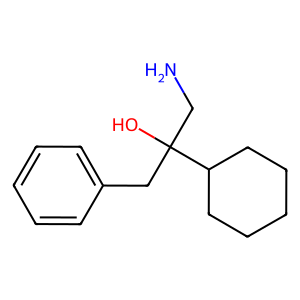

initial molecule:


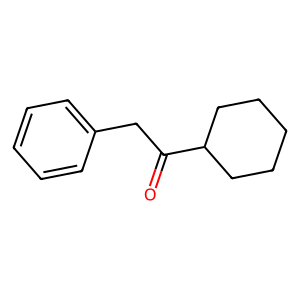

In [27]:
if __name__ == "__main__":
    main()

<span style="font-size:14pt; text-decoration:underline;"> Test 2 </span>

In [22]:
#if __name__ == "__main__":
    #main()

<span style="font-size:14pt; text-decoration:underline;"> Test 3 </span>

<div style="font-size:11pt;"> The limitation of this code is that it lacks in flexibility since the conditions are strings contained in a list; even a change of space can disrupt the code. The code will ask to re-write the conditions. </div>

In [60]:
if __name__ == "__main__":
    main()

Initial molecule? Write in SMILES. Else, press Enter c1ccccc1CC(=O)C1CCCCC1


Initial molecule is in the start list.


Is there a second initial molecule? If not, press Enter 
Conditions? y/n y


Copy paste conditions from the list below
['Base and Nucleophile', 'Acid and Nucleophile ', 'H2O and acid', ' H+ and 1equiv MeOH', 'H+ and 2equiv MeOH', 'Acid', 'pH>6', '4<pH<6', 'Base', 'OCCS(=O)(=O)[O-].[Na+]', 'S(=O)(=O)[O-].[Na+]', 'NH3, HCN', 'HCN, LiAlH4', 'H+,H2O', 'HCN', 'C2OOH, CNH3', 'Base', 'H-', 'NaBH4, -78°C', 'NaBH4, CeCl3, MeOH', 'LiAlH4, 2 équiv.', 'LiAlH4', 'H+, NaBH3CN', 'NH2NH2, KOH, 180°C', 'Zn(Hg), HCl, reflux', 'Al(OR)3', 'SmI2, THF, -10°C', 'KOH, reflux', 'CN-, EtOH, H2O', 'KCN (0,3 equiv), 18-C-6 (0,1 equiv)', 'Catalyst: CN', 'Al(iPr)3', 'KHMDS, 18-Crown-6, -78°C']


Conditions: gt


Condition entered is not in the list. Please try again.


Conditions? y/n n


No conditions applied.


Final molecule? Write in SMILES. Else, press Enter 
Is there a second final molecule? If not, press Enter 


<span style="font-size:14pt; text-decoration:underline;"> Test 4 </span>

<div style="font-size:11pt;"> The initial molecule must be input in a valid Smiles version otherwise the code isn't unable to read the input information. </div>

In [26]:
if __name__ == "__main__":
    main()

Initial molecule? Write in SMILES. Else, press Enter c1c1CC(=O)C1CCCCC1


[14:40:57] SMILES Parse Error: ring closure 1 duplicates bond between atom 0 and atom 1 for input: 'c1c1CC(=O)C1CCCCC1'


Invalid SMILES string entered.


Is there a second initial molecule? If not, press Enter 
Conditions? y/n n
Final molecule? Write in SMILES. Else, press Enter 
Is there a second final molecule? If not, press Enter 


<span style="font-size:14pt; text-decoration:underline;"> Test 5 </span>

In [ ]:
#if __name__ == "__main__":
    #main()